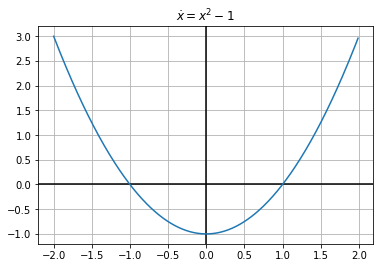

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-2,2,0.01)
xdot = x**2 - 1
plt.title(r"$\dot{x} = x^2 - 1$")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")
plt.plot(x,xdot)
plt.grid()
plt.show()

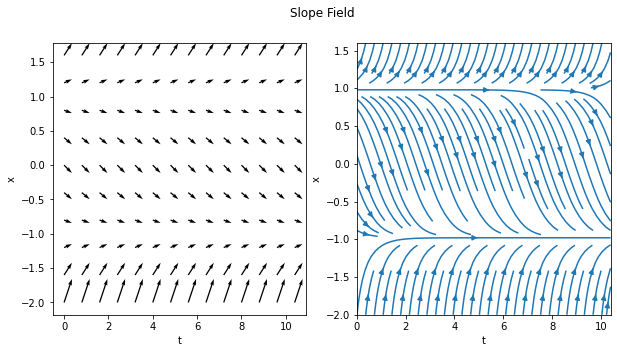

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 11, 0.8)
x = np.arange(-2, 2, 0.4)

# Make grid
T, X = np.meshgrid(t, x)

# calculate derivative (dt is const so just use ones)
dx = X**2 - 1
dt = np.ones(dx.shape)

# plot
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.quiver(T,X,dt,dx)
plt.xlabel("t")
plt.ylabel("x")
plt.subplot(1,2,2)
plt.streamplot(T,X,dt,dx)
plt.xlabel("t")
plt.ylabel("x")
plt.suptitle("Slope Field")
plt.show()

In [3]:
def SHOPhasePortrait(x, vx, omega):
    '''SHOPhasePortrait returns the value of
    the change in the phase variables at a given location
    in phase space for the SHO model'''
    
    xdot, vxdot = [vx, -1*omega**2*x] ## Specific to this problem
    
    return xdot, vxdot

def ComputeSHOPhase(X, VX, omega):
    '''ComputeSHOPhase returns the changes in 
    the phase variables across a grid of locations
    that are specified'''
    
    ## Prep the arrays with zeros at the right size
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    ## Set the limits of the loop based on how 
    ## many points in the arrays we have
    Xlim, Ylim = X.shape
    
    ## Calculate the changes at each location and add them to the arrays
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = SHOPhasePortrait(xloc, yloc, omega)
            
    return xdot, vxdot

def SHOTrajectory(x0, vx0, omega, N=100):
    '''SHOTrajectory computes the phase space
    trjectory using the analytical forms of the
    solution. Note this sloppy analytical approach
    only works because the SHO is perfectly sinusoidal.'''
    
    ## Only work with one period
    T = 2*np.pi/omega
    t = np.arange(0,T,T/N)
    
    ## I derived this in general with Acos(wt+phi)
    ## It's not in general a good approach
    ## because you are not guaranteed analytical 
    ## closed form trajectories in phase space
    
    phi = np.arctan2(-1*vx0, omega*x0) ## arctan(-vxo/(omega*x0)) taken correctly for the quadrant
    A = x0/np.cos(phi)
    x_traj = A*np.cos(omega*t+phi)
    v_traj = -omega*A*np.sin(omega*t+phi)
    
    return x_traj, v_traj

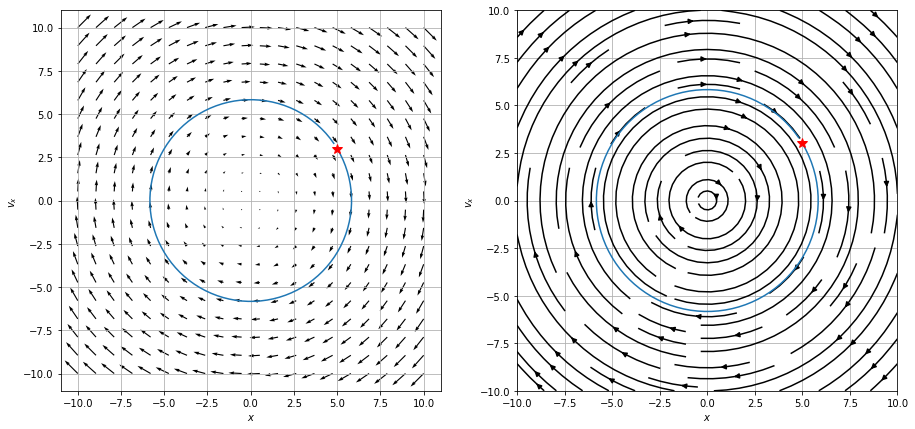

In [4]:
## Setting parameters and the phase space variables

omega = 1
x = np.linspace(-10.0, 10.0, 20)
vx = np.linspace(-10.0, 10.0, 20)

## Get back pairs of coordinates for every point in the space
X, VX = np.meshgrid(x, vx)

## Run our calculations
xdot, vxdot = ComputeSHOPhase(X, VX, omega)

x0 = 5
vx0 = 3
x_traj, v_traj = SHOTrajectory(x0, vx0, omega)

## Plot. plot. plot.
ax = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)

## Plot with Quiver
Q = plt.quiver(X, VX, xdot, vxdot, color='k')

## Plot trajectory and the starting location
plt.plot(x_traj,v_traj)
plt.plot(x0, vx0, 'r*', markersize=10)

plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()

plt.subplot(1,2,2)
## Plot with streamplot for subplot
Q = plt.streamplot(X, VX, xdot, vxdot, color='k')
plt.plot(x_traj,v_traj)
plt.plot(x0, vx0, 'r*', markersize=10)

plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()

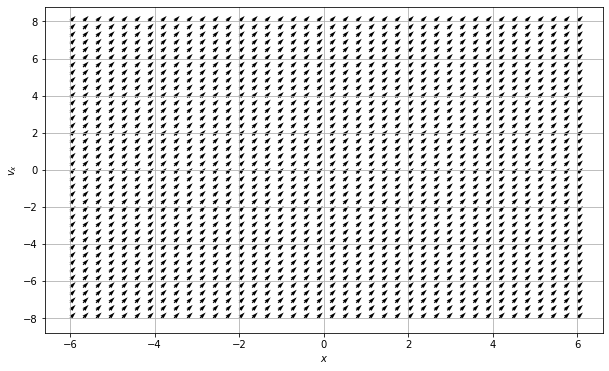

In [5]:
def LAPPhasePortrait(x, vx, omega0 = 10):
    
    #################
    ## CHANGE THIS ##
    #################
    xdot, vxdot = [1, 1] ## Specific to the problem
    
    return xdot, vxdot

def ComputeLAPPhase(X, VX, omega0):
    
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    Xlim, Ylim = X.shape
    
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = LAPPhasePortrait(xloc, yloc, omega0)
            
    return xdot, vxdot

omega0 = 2
N = 40

x = np.linspace(-6.0, 6.0, N)
vx = np.linspace(-8.0, 8.0, N)

X, VX = np.meshgrid(x, vx)

xdot, vxdot = ComputeLAPPhase(X, VX, omega0)

ax = plt.figure(figsize=(10,6))
Q = plt.quiver(X, VX, xdot, vxdot, color='k')
plt.grid()

plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.show()